<tr>
<td style="text-align: center;">
    <div style="display: inline-block;text-align: center">
        <img src="Logo_CentraleSupélec.png" style="width: 30%;">
        <img src="Logo-HeadMind-Partners.png" style="width: 50%;">
    </div>
</td>
</tr>


<h1 style="font-family: Georgia, Arial; font-size: 36px;">Getting the news</h1>
<p style="font-size: 24px;">Infonum Project</p>
<p style="font-size: 24px;"></p>
<p style="font-size: 24px;">Members: Francisco García, Olivia Moyal, Ibrahim Ramdane</p>


This Jupyter Notebook is designed to embark on a journey through the world of news data, leveraging the power of Python libraries such as `pandas` for data manipulation, and the `NewsApiClient` for accessing a wide array of news articles across different sources. Our goal is to fetch, process, and analyze news data. 


#### Import Librairies

In [3]:
import pickle
import pandas as pd
from newsapi import NewsApiClient

Use of newsapi with our account key

In [10]:
api_key='0bd6a2cb38be48d69a501953ef7f8270'
newsapi = NewsApiClient(api_key=api_key)
# fgara : beea3e5555144725be547cee1ea3fa03
# fcs : 0bd6a2cb38be48d69a501953ef7f8270

#### Getting the news

Class ``NewsFetcher`` is a wrapper for the News API. It provides a way to interact with the News API to get news articles from various sources and categories. 

In [18]:
import requests  # Assuming you're using the requests library for API calls

class NewsFetcher:
    def __init__(self, api_key):
        self.sources = 'ars-technica,associated-press,axios,breitbart-news,business-insider,buzzfeed,engadget,fortune,hacker-news,next-big-future,recode,time,wired,bbc-news,the-verge,abc-news,bloomberg,cbc-news,google-news,cnn,reuters,msnbc,the-wall-street-journal,the-washington-times'
        self.sortBy = 'popularity'
        self.api_key = api_key  # API key for authentication

    def is_leap_year(self, year):
        """Check if a year is a leap year."""
        return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)

    def fetch_articles(self, from_time, to_time, query):
        """Fetch articles within a time range for a specific query."""
        articles = []
        try:
            response = requests.get(
                'https://newsapi.org/v2/everything',
                params={
                    'sources': self.sources,
                    'from': from_time,
                    'to': to_time,
                    'language': 'en',
                    'sortBy': self.sortBy,
                    'apiKey': self.api_key
                }
            )
            response.raise_for_status()  # Raise an error for bad responses
            articles = response.json().get('articles', [])
        except requests.RequestException as e:
            print(f"Failed to fetch articles: {e}")
        return articles

    def fetch_news(self, start_date, end_date, query):
        """Fetch news articles for a range of dates."""
        from datetime import datetime, timedelta

        start = datetime.fromisoformat(start_date)
        end = datetime.fromisoformat(end_date)

        current = start
        articles_total = {}

        while current <= end:
            # ISO 8601 date strings
            from_time = current.isoformat()
            to_time = (current + timedelta(hours=6)).isoformat()

            articles = self.fetch_articles(from_time, to_time, query)
            articles_total[from_time] = articles

            # Increment current time by 6 hours
            current += timedelta(hours=6)

            # Handle next day transition
            if current.day != (current - timedelta(hours=6)).day:
                # Adjust to start at the beginning of the next day
                current = datetime(current.year, current.month, current.day)

        return articles_total

# Example usage:
api_key='0bd6a2cb38be48d69a501953ef7f8270'
news_fetcher = NewsFetcher(api_key)
start_date = "2024-02-28"
end_date = "2024-03-05"
query = "your query here"
articles = news_fetcher.fetch_news(start_date, end_date, query)


In [19]:
articles

{'2024-02-28T00:00:00': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Steve Dent',
   'title': "Amazon accused of using AI to 'replicate the voices' of actors in Road House remake",
   'description': "Amazon is being sued by the writer of the original 1989 Patrick Swayze version of the film Road House over alleged copyright infringement in the movie's remake, The Los Angeles Times has reported. Screenwriter R. Lance Hill accuses Amazon and MGM Studios of u…",
   'url': 'https://www.engadget.com/amazon-accused-of-using-ai-to-replicate-the-voices-of-actors-in-road-house-remake-054408057.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2024-02/7d708de0-d5fb-11ee-b1ff-260ce75ee021',
   'publishedAt': '2024-02-28T05:44:08Z',
   'content': "Amazon is being sued by the writer of the original 1989 Patrick Swayze version of the film Road House over alleged copyright infringement in the movie's remake, The Los Angeles Times has reported. Sc… [+1862 chars]

#### Analyze of data over time

In the following cells, we make sure that the distribution over hours and days uniform

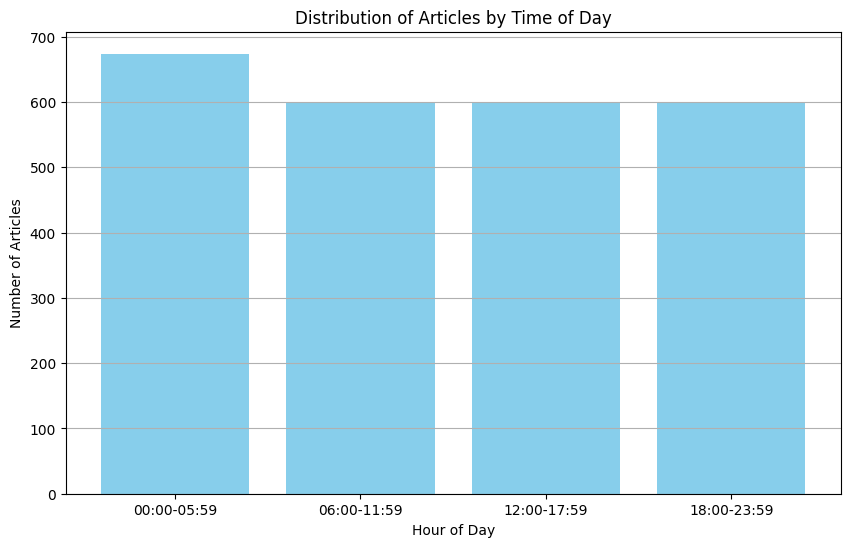

In [20]:
import matplotlib.pyplot as plt

# Assuming you have executed something like this before:
# articles = news_fetcher.fetch_news(start_date, end_date, query)

# Initialize counts for each 6-hour segment
article_counts = [0, 0, 0, 0]  # Corresponding to 00:00-05:59, 06:00-11:59, 12:00-17:59, 18:00-23:59

for timestamp in articles.keys():
    hour = int(timestamp[11:13])  # Extract hour from timestamp
    index = hour // 6  # Determine which segment the hour belongs to
    article_counts[index] += len(articles[timestamp])

# Set up the hour labels for the x-axis
hours = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(hours, article_counts, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles by Time of Day')
plt.xticks(hours)
plt.grid(axis='y')

plt.show()


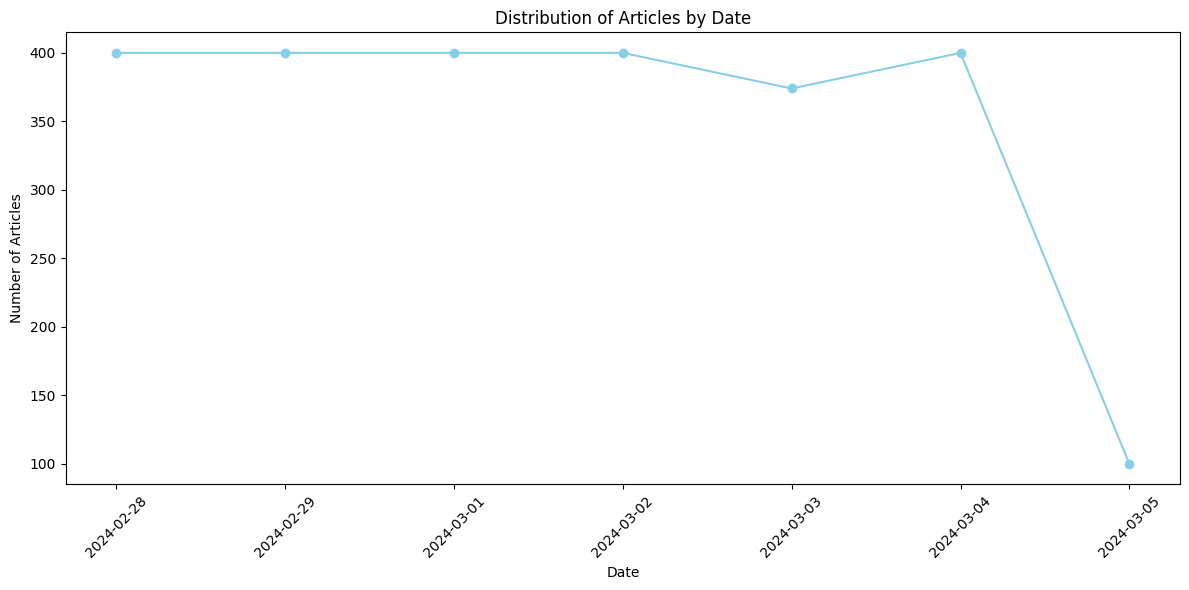

In [21]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Initialize a dictionary to count articles per day
article_counts_per_day = {}

# Assuming articles is the result from your fetch_news method
# articles = news_fetcher.fetch_news(start_date, end_date, query)

start_date = datetime.fromisoformat(start_date)
end_date = datetime.fromisoformat(end_date)
current_date = start_date

# Initialize article counts for each day in the range to ensure continuity in the plot
while current_date <= end_date:
    formatted_date = current_date.date().isoformat()  # Just the date in YYYY-MM-DD format
    article_counts_per_day[formatted_date] = 0
    current_date += timedelta(days=1)

# Count the number of articles for each day
for timestamp, articles_list in articles.items():
    date = timestamp[:10]  # Extract just the date part from the timestamp
    if date in article_counts_per_day:
        article_counts_per_day[date] += len(articles_list)

# Prepare data for plotting
dates = list(article_counts_per_day.keys())
counts = list(article_counts_per_day.values())

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(dates, counts, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles by Date')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


#### Other treatment of data

Convertion of all the information into a pandas data frame

In [23]:
#merged_dict = {**Microsoft_news_copy, **Microsoft_news_copy2}
merged_dict = {**articles}

In [26]:
df = pd.DataFrame()
for date, news in articles.items():
    a = [new for new in news]
    df_date = pd.DataFrame([{'Date': date, 'Name': new['source']['name'], 'Title': new['title'], 'Abstract':new['description']} for new in news])
    df = pd.concat([df, df_date], ignore_index=True)

In [27]:
df

,Date,Name,Title,Abstract
0,2024-02-28T00:00:00,Engadget,Amazon accused of using AI to 'replicate the v...,Amazon is being sued by the writer of the orig...
1,2024-02-28T00:00:00,Wired,A Major ‘Stardew Valley’ Update Is Coming in M...,A massive update to the wildly popular farm li...
2,2024-02-28T00:00:00,BBC News,Free tuition a 'beacon of hope' for med students,After a former professor donated $1bn the Bron...
3,2024-02-28T00:00:00,BBC News,King's pigeons bought by pigeon-racing opponents,Animal-welfare group buys some of the King's c...
4,2024-02-28T00:00:00,Business Insider,"The Apple Car is dead, and Elon Musk is speaki...","""The natural state of a car company is dead,"" ..."
...,...,...,...,...
2469,2024-03-05T00:00:00,ABC News,North Carolina's congressional delegation head...,Primaries in North Carolina will mark an excep...
2470,2024-03-05T00:00:00,ABC News,"In North Carolina, primary voters choosing can...",North Carolina primary voters are choosing pot...
2471,2024-03-05T00:00:00,ABC News,Arkansas voters could make history with 2 Supr...,Arkansas voters could make history in two race...
2472,2024-03-05T00:00:00,CBC News,Man with autism who killed father felt trapped...,Vincent Fong was powerless to escape his abusi...


Study and drop of duplicated columns and rows

In [28]:
# duplicate_columns in Microsoft_df
duplicate_columns = df.columns[df.columns.duplicated()]
print(len(duplicate_columns))
# duplicate_rows in Microsoft_df
duplicate_rows = df[df.duplicated()]
print(len(duplicate_rows))


0
67


In [29]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [30]:
df

,Date,Name,Title,Abstract
0,2024-02-28T00:00:00,Engadget,Amazon accused of using AI to 'replicate the v...,Amazon is being sued by the writer of the orig...
1,2024-02-28T00:00:00,Wired,A Major ‘Stardew Valley’ Update Is Coming in M...,A massive update to the wildly popular farm li...
2,2024-02-28T00:00:00,BBC News,Free tuition a 'beacon of hope' for med students,After a former professor donated $1bn the Bron...
3,2024-02-28T00:00:00,BBC News,King's pigeons bought by pigeon-racing opponents,Animal-welfare group buys some of the King's c...
4,2024-02-28T00:00:00,Business Insider,"The Apple Car is dead, and Elon Musk is speaki...","""The natural state of a car company is dead,"" ..."
...,...,...,...,...
2469,2024-03-05T00:00:00,ABC News,North Carolina's congressional delegation head...,Primaries in North Carolina will mark an excep...
2470,2024-03-05T00:00:00,ABC News,"In North Carolina, primary voters choosing can...",North Carolina primary voters are choosing pot...
2471,2024-03-05T00:00:00,ABC News,Arkansas voters could make history with 2 Supr...,Arkansas voters could make history in two race...
2472,2024-03-05T00:00:00,CBC News,Man with autism who killed father felt trapped...,Vincent Fong was powerless to escape his abusi...


In [31]:
df.columns

Index(['Date', 'Name', 'Title', 'Abstract'], dtype='object')

#### Saving the df

In [17]:
import pandas as pd
name_of_file = "name_file"
df.to_pickle('name_of_file')
